In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Housing.csv")
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [3]:
df["price_category"] = pd.qcut(df["price"], q=3, labels=["Low", "Medium", "High"])

X = df.drop(["price", "price_category"], axis=1)
y = df["price_category"]

In [4]:
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
svm_model = SVC(kernel='rbf', decision_function_shape='ovr')  # One-vs-Rest multi-class
svm_model.fit(X_train, y_train)

SVC()

In [8]:
y_pred = svm_model.predict(X_test)

In [9]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7064220183486238

Classification Report:
               precision    recall  f1-score   support

        High       0.92      0.75      0.82        44
         Low       0.82      0.69      0.75        39
      Medium       0.42      0.65      0.52        26

    accuracy                           0.71       109
   macro avg       0.72      0.70      0.70       109
weighted avg       0.76      0.71      0.72       109



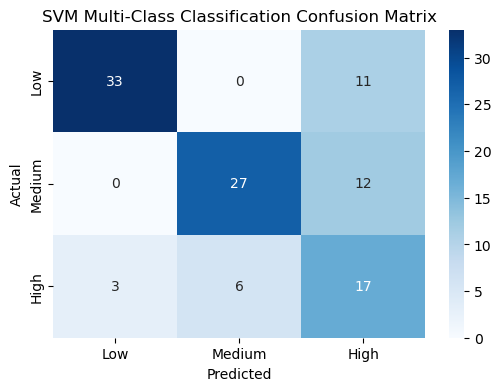

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Multi-Class Classification Confusion Matrix")
plt.show()